In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
from sklearn.metrics import mean_squared_error

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('processed-temperature.csv')

In [4]:
df.columns

Index(['Date', 'temperature'], dtype='object')

In [5]:
rain = pd.read_csv('chennai_reservoir_rainfall.csv')

In [6]:
type(rain["Date"])

pandas.core.series.Series

In [7]:
type(df["Date"])

pandas.core.series.Series

In [8]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [9]:
rain["Date"] = pd.to_datetime(rain["Date"], format='%d-%m-%Y')

In [10]:
rain["Date"] = pd.to_datetime(rain["Date"], format='%m-%d-%Y')

In [11]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


In [12]:
df["Date"] = pd.to_datetime(df["Date"], format='%m-%d-%Y')

In [13]:
df.head()

,Date,temperature
0,1995-01-01,72.4
1,1995-01-02,73.5
2,1995-01-03,72.6
3,1995-01-04,75.2
4,1995-01-05,74.8


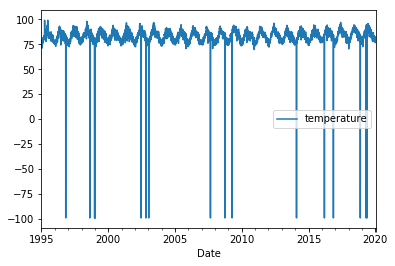

In [14]:
df.plot(x='Date')

In [15]:
df.loc[df['temperature'] < 0]

,Date,temperature
664,1996-10-26,-99.0
1323,1998-08-16,-99.0
1453,1998-12-24,-99.0
1454,1998-12-25,-99.0
1459,1998-12-30,-99.0
1460,1998-12-31,-99.0
1470,1999-01-10,-99.0
2725,2002-06-18,-99.0
2726,2002-06-19,-99.0
2727,2002-06-20,-99.0


In [16]:
idx = df.loc[df["temperature"] < 0].index

In [17]:
for i in range(-4,5):
    print(df.iloc[idx[0] + i]['temperature'])

82.9
82.1
79.6
84.3
-99.0
83.7
81.0
82.0
81.4


In [18]:
idx = df.loc[df['temperature'] < 0].index

In [19]:
for i in idx:
    if df.iloc[i+1][1] > 0:
        df.iloc[i,1] = (df.iloc[i-1, 1] + df.iloc[i+1, 1]) / 2
    else:
        df.iloc[i,1] = (df.iloc[i-1, 1])

In [20]:
# for i in idx:
#     for j in range(-4,5):
#         print(df.iloc[i + j]['temperature'])

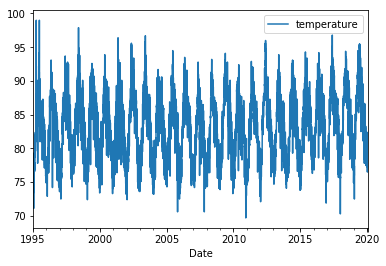

In [21]:
df.plot(x='Date')

In [22]:
df.describe()

,temperature
count,9158.000000
mean,83.407043
std,4.730817
min,69.700000
25%,79.400000
50%,83.800000
75%,87.000000
max,99.000000


In [23]:
df.loc[df['temperature'] >= 99]

,Date,temperature
87,1995-03-29,99.0
172,1995-06-22,99.0


In [24]:
idx = df.loc[df['temperature'] >= 99].index

In [25]:
for i in range(-4,5):
    print(df.iloc[87 + i]['temperature'])

84.0
84.2
82.6
84.2
99.0
85.1
84.3
84.7
84.6


In [26]:
for i in range(-4,5):
    print(df.iloc[172 + i]['temperature'])

89.7
89.9
91.3
86.5
99.0
84.1
85.6
85.1
87.4


In [27]:
for i in idx:
    if df.iloc[i+1][1] < 99:
        df.iloc[i,1] = (df.iloc[i-1, 1] + df.iloc[i+1, 1]) / 2
    else:
        df.iloc[i,1] = (df.iloc[i-1, 1])

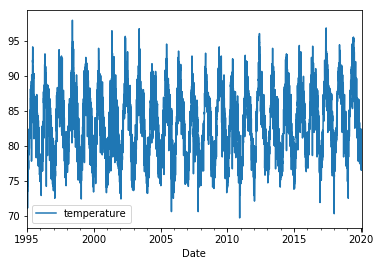

In [28]:
df.plot(x='Date')

In [29]:
df.describe()

,temperature
count,9158.00000
mean,83.40398
std,4.72526
min,69.70000
25%,79.40000
50%,83.80000
75%,87.00000
max,97.90000


In [30]:
idx = df.loc[df['temperature'] == max(df["temperature"])].index

In [31]:
for i in range(-4,5):
    print(df.loc[idx + i])

           Date  temperature
1239 1998-05-24         93.8
           Date  temperature
1240 1998-05-25         93.1
           Date  temperature
1241 1998-05-26         94.0
           Date  temperature
1242 1998-05-27         97.8
           Date  temperature
1243 1998-05-28         97.9
           Date  temperature
1244 1998-05-29         96.1
           Date  temperature
1245 1998-05-30         92.6
           Date  temperature
1246 1998-05-31         92.5
           Date  temperature
1247 1998-06-01         91.4


In [48]:
df.shape

(9158, 2)

In [59]:
dff = df.temperature

In [61]:
df.to_csv('processed-temperature.csv')

In [32]:
from pandas.plotting import lag_plot

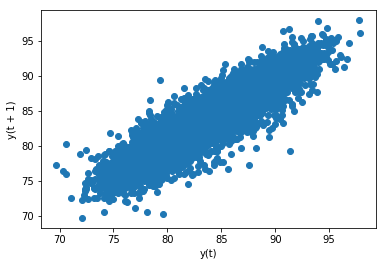

In [33]:
lag_plot(df['temperature'])

In [34]:
df.values

array([[Timestamp('1995-01-01 00:00:00'), 72.4],
       [Timestamp('1995-01-02 00:00:00'), 73.5],
       [Timestamp('1995-01-03 00:00:00'), 72.6],
       ...,
       [Timestamp('2020-01-25 00:00:00'), 76.8],
       [Timestamp('2020-01-26 00:00:00'), 78.7],
       [Timestamp('2020-01-27 00:00:00'), 80.0]], dtype=object)

In [35]:
dataframe = pd.concat([df['temperature'].shift(1), df.temperature], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.933585
t+1  0.933585  1.000000


In [36]:
from pandas.plotting import autocorrelation_plot

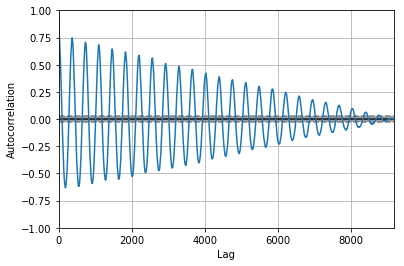

In [37]:
autocorrelation_plot(df['temperature'])

In [38]:
autocorrelation_plot?

In [39]:
import keras

Using TensorFlow backend.


In [40]:
from keras import layers

In [41]:
from keras import Sequential

In [42]:
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.LSTM(128))

model.add(layers.Dense(10))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit?

In [47]:
rain = pd.read_csv('chennai_reservoir_rainfall.csv')

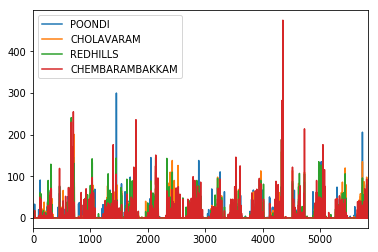

In [48]:
rain.plot()

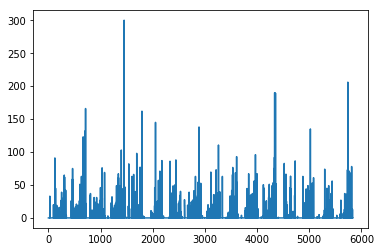

In [49]:
plt.plot(rain['POONDI'])

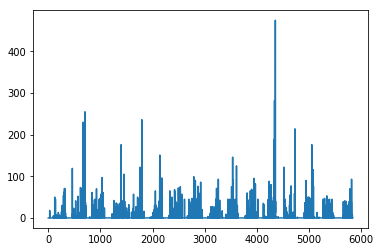

In [50]:
plt.plot(rain['CHEMBARAMBAKKAM'])

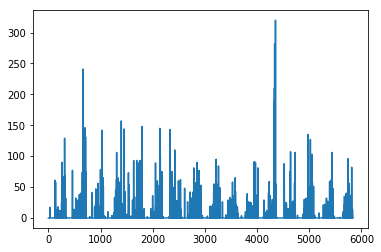

In [51]:
plt.plot(rain['REDHILLS'])

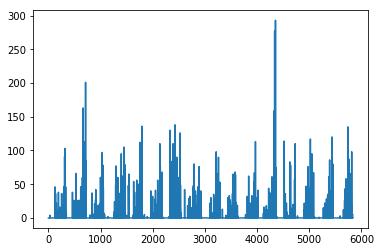

In [52]:
plt.plot(rain['CHOLAVARAM'])

In [64]:
values = pd.DataFrame(df['temperature'].values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [83]:
values = pd.DataFrame(df['temperature'].values)

array([[ nan, 72.4],
       [72.4, 73.5],
       [73.5, 72.6],
       ...,
       [77.8, 76.8],
       [76.8, 78.7],
       [78.7, 80. ]])

In [65]:
import keras

In [66]:
from keras import layers

In [67]:
from keras import Sequential

In [68]:
from keras import backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [222]:
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.SimpleRNN(32))

model.add(layers.Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 67,137
Trainable params: 67,137
Non-trainable params: 0
_________________________________________________________________


In [223]:
#series.shape

In [224]:
x = train_X

In [225]:
y = train_y

In [226]:
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

In [231]:
model.fit(x, y, epochs=20, batch_size=64)

Epoch 1/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.9561 - acc: 0.0162
Epoch 2/20
9150/9150 [==============================] - 0s 15us/step - loss: 1.7303 - acc: 0.0223
Epoch 3/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.5872 - acc: 0.0219
Epoch 4/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.4945 - acc: 0.0215
Epoch 5/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.4398 - acc: 0.0225
Epoch 6/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.3975 - acc: 0.0223
Epoch 7/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.3718 - acc: 0.0246
Epoch 8/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.3511 - acc: 0.0243
Epoch 9/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.3421 - acc: 0.0234
Epoch 10/20
9150/9150 [==============================] - 0s 16us/step - loss: 1.3356 - acc: 0.0249
Epoch 11/20
9150/91

In [232]:
test_Res = model.predict(test_X)

In [233]:
mean_squared_error(test_Res, test_y)

1.6229071366121768

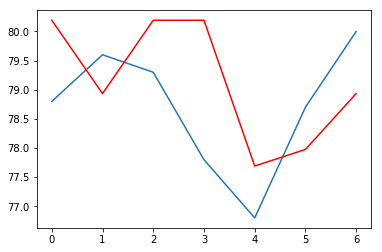

In [234]:
plt.plot(test_y)
plt.plot(test_Res, color='red')
plt.show()

In [141]:
model1 = Sequential()

model1.add(layers.Embedding(input_dim=1000, output_dim=64))

model1.add(layers.LSTM(64))

model1.add(layers.Dense(1))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


In [142]:
model1.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

In [218]:
model1.fit(x, y, epochs=20, batch_size=64)

Epoch 1/20
9150/9150 [==============================] - 0s 26us/step - loss: 1.2691 - acc: 0.0263
Epoch 2/20
9150/9150 [==============================] - 0s 27us/step - loss: 1.2707 - acc: 0.0247
Epoch 3/20
9150/9150 [==============================] - 0s 28us/step - loss: 1.2720 - acc: 0.0258
Epoch 4/20
9150/9150 [==============================] - 0s 27us/step - loss: 1.2726 - acc: 0.0255
Epoch 5/20
9150/9150 [==============================] - 0s 27us/step - loss: 1.2708 - acc: 0.0243
Epoch 6/20
9150/9150 [==============================] - 0s 27us/step - loss: 1.2703 - acc: 0.0247
Epoch 7/20
9150/9150 [==============================] - 0s 27us/step - loss: 1.2722 - acc: 0.0247
Epoch 8/20
9150/9150 [==============================] - 0s 31us/step - loss: 1.2731 - acc: 0.0252
Epoch 9/20
9150/9150 [==============================] - 0s 29us/step - loss: 1.2721 - acc: 0.0249
Epoch 10/20
9150/9150 [==============================] - 0s 28us/step - loss: 1.2715 - acc: 0.0257
Epoch 11/20
9150/91

In [219]:
test_LS = model1.predict(test_X)

In [220]:
mean_squared_error(test_LS, test_y)

1.4905017587825284

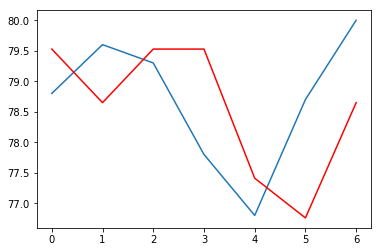

In [221]:
plt.plot(test_y)
plt.plot(test_LS, color='red')
plt.show()